In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### Data Loading

In [2]:
breast = load_breast_cancer()
breast.data = sklearn.preprocessing.scale(breast.data)
df_data = pd.DataFrame(breast.data, columns=breast.feature_names)
df_data.insert(0,"target", breast.target)
df_data.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [3]:
# Split Dataset
X_train, X_test, Y_train, Y_test = train_test_split(breast.data, breast.target, test_size=0.2)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
print(f"Dimensions of the training set: {X_train.shape}")

Dimensions of the training set: (455, 30)


## Homemade Logistic Regression

Our prediction model aims at classifying input between 2 possible values: 0 and 1. The model writes as follows:

$$ f_\theta(\mathbf{x}) = \hat{y} = \frac{1}{1+\exp\{-\theta^T \mathbf{x}\}} $$

which can be achieved by estimating the following linear model

$$ \text{log}\left[ \frac{\mathbb{P}[y = 1]}{1-\mathbb{P}[y=1]} \right] = \theta^T \mathbf{x}$$

### Model

In [4]:
# Select variables to use for the model
arr_var_name = np.array(["mean perimeter", "mean compactness"])
arr_target_name = np.array(["target"])

# Split
X_train, X_test, Y_train, Y_test = train_test_split(df_data[arr_var_name].values, df_data[arr_target_name].values, test_size=0.3)
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [5]:
# Get the number of parameters
thetas = np.ones(arr_var_name.shape[0] + 1)
thetas *= 0.001

# Response function
def logistic_regression(thetas : np.array, x : np.array) -> float:
    return 1 / (1 + np.exp(-x @ thetas))

## Loss function

We want a cost function that allows to minimise the Cross-Entropy cost function defined as follows:

$$ \hat{\theta} = \underset{\theta}{\operatorname{argmin}} \: J(\theta) = -\sum_{i=1}^{N}  y_i \: \operatorname{log}(f_\theta(\mathbf{x}_i)) + (1 - y_i) \: \operatorname{log}(1 - f_\theta(\mathbf{x}_i))

In [6]:
# Definition of the cross entropy function
def cross_entropy(Y : np.array, Y_pred : np.array) -> float:

    # Compute the loss for each row
    arr_cross = Y * np.log(Y_pred) + (1-Y) * np.log(1 - Y_pred)
    
    # Return
    return 1 / Y_pred.shape[0] * np.sum(arr_cross)

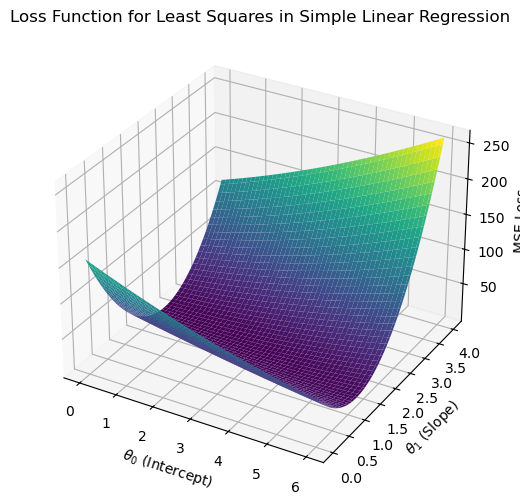

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 20)   # 20 data points
true_theta0, true_theta1 = 1, 2  # True parameters
# Y = true_theta0 + true_theta1 * X + np.random.normal(scale=2, size=X.shape)  # Add noise
Y = true_theta0 + true_theta1 * X 

# Define MSE Loss Function
def mse_loss(theta0, theta1, X, Y):
    Y_pred = theta0 + theta1 * X
    return np.mean((Y - Y_pred) ** 2)

# Create meshgrid of theta values
theta0_vals = np.linspace(0, 6, 100)
theta1_vals = np.linspace(0, 4, 100)
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Compute loss values
Loss = np.array([[mse_loss(t0, t1, X, Y) for t1 in theta1_vals] for t0 in theta0_vals])

# Plot 3D loss surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta0, Theta1, Loss.T, cmap='viridis')

# Labels
ax.set_xlabel(r'$\theta_0$ (Intercept)')
ax.set_ylabel(r'$\theta_1$ (Slope)')
ax.set_zlabel('MSE Loss')
ax.set_title('Loss Function for Least Squares in Simple Linear Regression')
plt.show()


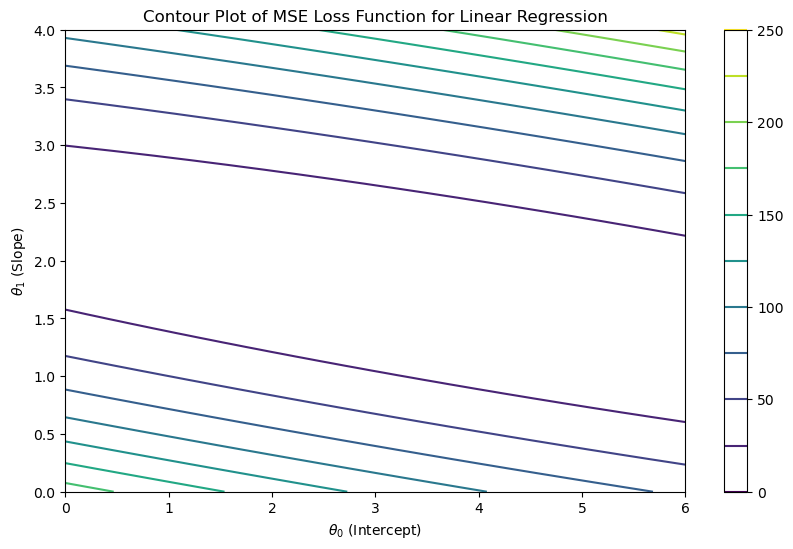

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 20)   # 20 data points
true_theta0, true_theta1 = 3, 2  # True parameters
Y = true_theta0 + true_theta1 * X + np.random.normal(scale=2, size=X.shape)

# Define MSE Loss Function
def mse_loss(theta0, theta1, X, Y):
    Y_pred = theta0 + theta1 * X
    return np.mean((Y - Y_pred) ** 2)

# Create meshgrid of theta values (theta0, theta1)
theta0_vals = np.linspace(0, 6, 100)  # Range for theta0
theta1_vals = np.linspace(0, 4, 100)  # Range for theta1
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Compute loss values for each (theta0, theta1) pair
Loss = np.array([[mse_loss(t0, t1, X, Y) for t1 in theta1_vals] for t0 in theta0_vals])

# Create contour plot
plt.figure(figsize=(10, 6))
cp = plt.contour(Theta0, Theta1, Loss.T, levels=10, cmap='viridis')

# Adding labels
plt.colorbar(cp)
plt.xlabel(r'$\theta_0$ (Intercept)')
plt.ylabel(r'$\theta_1$ (Slope)')
plt.title('Contour Plot of MSE Loss Function for Linear Regression')

plt.show()

## Gradient Descent Algorithm

We minimise the above function using standard Gradient Descent Algorithm, which is defined as follows, with $\alpha$ the learning rate:

\begin{cases}
    \theta_0 = \theta_0 \\
    \theta_j = \theta_j - \alpha * \frac{\partial J(\theta)}{\partial \theta_j}
\end{cases}


The partial derivatives of each element are given by 

$$ \frac{\partial J(\theta)}{\theta_j} = \sum_{i=1}^{N}(f_{\theta}(\mathbf{x}_i) - y_i)\mathbf{x}_i^{(j)}$$

In [289]:
# Weights update
def partial_j(Y : np.array, Y_pred : np.array, X_j : np.array):

    arr_pdj = (Y_pred - Y)
    S = arr_pdj.T @ X_j
    return S

# Update Gradient
def update_gradient(Y : np.array, Y_pred : np.array, X : np.array) -> np.array:

    arr_grad = np.zeros(X.shape[1])
    for j in range(X.shape[1]):
        arr_grad[j] = partial_j(Y, Y_pred, X[:, j])
    return arr_grad

# Update theta
def update_thetas(arr_thetas : np.array, arr_grad : np.array, alpha : float) -> np.array:

    arr_thetas = arr_thetas - alpha * arr_grad
    return arr_thetas

## Fitting the model to the data

In [295]:
# Fitting the model via gradient descent algorithm
def fit(Y : np.array, X : np.array) -> np.array:

    # Initial Thetas
    arr_thetas = np.ones(X.shape[1]) * 5

    # Optimisation parameters
    TOL = 10**(-5)
    MAX_ITER = 1000
    ALPHA = 0.01
    previous_loss = 0

    # Storage values
    l_thetas = []
    l_loss = []
    l_pred = []

        
    # Initial Conditions
    Y_pred = logistic_regression(arr_thetas, X)
    curr_loss = cross_entropy(Y, Y_pred)
    l_thetas.append(arr_thetas)
    l_pred.append(Y_pred)
    l_loss.append(curr_loss)
    i = 0

    # Loop to fit the data
    while (i <= MAX_ITER) and (abs(curr_loss - previous_loss) > TOL):


        previous_loss = curr_loss

        # Update weights
        arr_grad = update_gradient(Y, Y_pred, X)
        arr_thetas = update_thetas(arr_thetas, arr_grad, ALPHA)

        # Compute new predictions
        Y_pred = logistic_regression(arr_thetas, X)
        curr_loss = cross_entropy(Y, Y_pred)

        # Store the data
        l_thetas.append(arr_thetas)
        l_loss.append(curr_loss)
        l_pred.append(Y_pred)

        # Move to next iteration
        i+=1

    print(f"Convergence reached after {i} iterations")
    return l_pred, l_thetas, l_loss

In [296]:
l_pred, l_thetas, l_loss = fit(Y_train, X_train)

Convergence reached after 53 iterations


/var/folders/0j/xg84xfs95fvgnf6ybchnln980000gn/T/ipykernel_36908/3846941191.py:5: RuntimeWarning:

divide by zero encountered in log



## Visual Inspection of the Optimisation Process

[array([5., 5., 5.]),
 array([4.91895922, 2.40725359, 2.70422095]),
 array([3.98174227, 0.41209477, 1.04791962]),
 array([ 2.63744171, -1.16444419, -0.2065026 ]),
 array([ 1.63723253, -2.09766499, -0.97422362]),
 array([ 1.31238559, -2.31873453, -1.12023268]),
 array([ 1.12711746, -2.46483897, -1.19338196]),
 array([ 1.01356822, -2.57900239, -1.23721994]),
 array([ 0.94193107, -2.67495758, -1.26615077]),
 array([ 0.89609636, -2.75867646, -1.28647626]),
 array([ 0.86660013, -2.83328602, -1.3014109 ]),
 array([ 0.84763929, -2.90066296, -1.31277011]),
 array([ 0.83555958, -2.96205598, -1.32165676]),
 array([ 0.82801577, -3.01836164, -1.32877803]),
 array([ 0.82348051, -3.0702601 , -1.33460629]),
 array([ 0.82094728, -3.11828809, -1.33946719]),
 array([ 0.81974637, -3.16288158, -1.34359094]),
 array([ 0.81942869, -3.20440239, -1.34714364]),
 array([ 0.81969128, -3.24315579, -1.35024724]),
 array([ 0.82032886, -3.2794028 , -1.3529926 ]),
 array([ 0.82120201, -3.31336897, -1.35544833]),
 arr

In [298]:
model = LogisticRegression().fit(X_train[:, 1:], Y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [0.81840359]
Coefficients: [[-3.29360339 -1.28243031]]


In [ ]:
# Definition of the cross entropy function
def cross_entropy(Y : np.array, Y_pred : np.array) -> float:

    # Compute the loss for each row
    arr_cross = Y * np.log(Y_pred) + (1-Y) * np.log(1 - Y_pred)

    # Return
    return 1 / y_pred.shape[0] * np.sum(arr_cross)

nan

In [183]:
# Visualisation
fig = px.scatter(df_data, "target", "mean perimeter",
           color=df_data["target"].astype(str),
           color_discrete_map={"1": "blue", "0": "red"})
fig.show()

In [184]:
fig = px.scatter(df_data, "mean perimeter", "mean compactness", color=df_data["target"].astype(str),
                 color_discrete_map={"1": "blue", "0": "red"})
fig.show()

### Fitting Logistic Regression

We want to fit the follwing model

$$ \text{log}(\frac{y_i}{1-y_i}) = \theta_0 + \theta_1 x_{1, i} + \theta_{2, i}$$ 

$$ \iff y_i = \frac{1}{1 + \text{exp}(-\theta^T x)} $$

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(df_data[["mean perimeter", "mean compactness"]], df_data["target"])
model = LogisticRegression().fit(X_train, Y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [0.65238476]
Coefficients: [[-3.22070364 -1.41226094]]


In [186]:
# Visualisation of the results
fig = go.Figure()
colors = Y_train.map({0: "red", 1: "blue"})
fig.add_trace(
    go.Scatter(
        x=X_train["mean perimeter"],
        y=X_train["mean compactness"],
        mode="markers",
        marker=dict(color=colors),
        name="Data"
    )
)

# Adding the separation boundary
theta0 = model.intercept_
theta1, theta2 = model.coef_[0]
x1_values = np.linspace(X_train["mean perimeter"].min(), X_train["mean perimeter"].max(), 100)
func = lambda x: (-theta0 - theta1 * x) / theta2
x2_values = func(x1_values)
arr_plot = np.array(list(zip(x1_values, x2_values)))
arr_plot = arr_plot[(arr_plot[:, 1] >= X_train["mean compactness"].min() - 0.1) & (arr_plot[:, 1] <= X_train["mean compactness"].max() + 0.1)]
fig.add_trace(
    go.Scatter(
        x=arr_plot[:, 0],
        y=arr_plot[:, 1],
        mode='lines',
        name="Separation Boundary",
        line=dict(color="black", width=1, dash="dash")
    )
)
fig.update_layout(
    title_text="Separation Boundary on Training Set"
)

In [64]:
y_predict = model.predict(X_train)

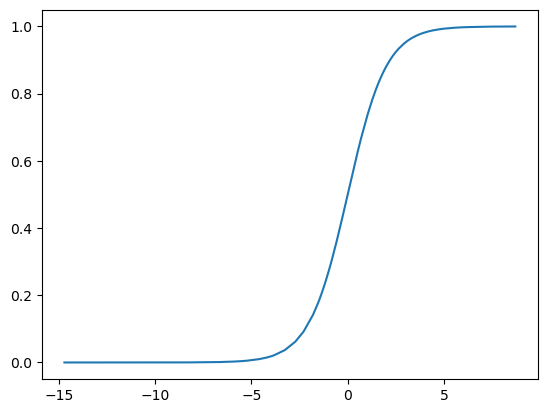

In [65]:
# Sigmooid Function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Training Data
X = X_train.values @ model.coef_[0] + model.intercept_[0]
Y = sigmoid(X)
arr_plot_train = np.array(list(zip(Y, X)))
arr_plot_train = arr_plot_train[arr_plot_train[:,1].argsort()]
arr_plot_train

# Testing Data
X = X_test.values @ model.coef_[0] + model.intercept_[0]
Y = sigmoid(X)
arr_plot_test = np.array(list(zip(Y, X)))
arr_plot_test = arr_plot_test[arr_plot_test[:,1].argsort()]
arr_plot_test

plt.plot(arr_plot_test[:, 1], arr_plot_test[:, 0])